In [46]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer

In [47]:
# Imputation function using limited forward fill
def impute_with_limit(series):
   last_valid_index = series.last_valid_index()
   
   if series[last_valid_index] == np.nan:
      # If there are no valid values, return the original series
      return series
   else:
      return series[:last_valid_index + 1].ffill()

In [5]:
# Connect to the SQLite database
conn = sqlite3.connect('data.db')

# Replace 'your_table' with the actual table name and 'conn' with your database connection
query = 'SELECT * FROM catalysts'

# Use the pandas read_sql function to read the data into a DataFrame
events_df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Now, you can work with the DataFrame 'df'
events_df['date'] = pd.to_datetime(events_df['date'])
events_df

stock_df = pd.read_csv('stock_data.csv', header=[0, 1], index_col=0, parse_dates=True)
# stock_df.index = pd.to_datetime(stock_df.index, utc=True)
# stock_df = stock_df.ffill()
stock_df


AADI                                                     \
                     open  high     low close    volume    vwap transactions   
2008-01-02 05:00:00   NaN   NaN     NaN   NaN       NaN     NaN          NaN   
2008-01-03 05:00:00   NaN   NaN     NaN   NaN       NaN     NaN          NaN   
2008-01-04 05:00:00   NaN   NaN     NaN   NaN       NaN     NaN          NaN   
2008-01-07 05:00:00   NaN   NaN     NaN   NaN       NaN     NaN          NaN   
2008-01-08 05:00:00   NaN   NaN     NaN   NaN       NaN     NaN          NaN   
...                   ...   ...     ...   ...       ...     ...          ...   
2023-09-25 04:00:00  4.97  5.05  4.9000  5.01   79009.0  4.9747       1054.0   
2023-09-26 04:00:00  5.01  5.35  4.9800  5.24   80152.0  5.1864        924.0   
2023-09-27 04:00:00  5.28  5.44  5.1801  5.22   79752.0  5.3177       1351.0   
2023-09-28 04:00:00  5.24  5.28  4.9200  4.97   51191.0  5.0474        899.0   
2023-09-29 04:00:00  4.98  5.01  4.6400  4.84  245350.0  4.7836       2170.0   

                       ABBV                  ...      ZYME          \
                       open    high     low  ...    volume    vwap   
2008-01-02 05:00:00     NaN     NaN     NaN  ...       NaN     NaN   
2008-01-03 05:00:00     NaN     NaN     NaN  ...       NaN     NaN   
2008-01-04 05:00:00     NaN     NaN     NaN  ...       NaN     NaN   
2008-01-07 05:00:00     NaN     NaN     NaN  ...       NaN     NaN   
2008-01-08 05:00:00     NaN     NaN     NaN  ...       NaN     NaN   
...                     ...     ...     ...  ...       ...     ...   
2023-09-25 04:00:00  152.44  154.74  151.66  ...  238159.0  6.3716   
2023-09-26 04:00:00  154.40  154.60  153.33  ...  416528.0  6.4015   
2023-09-27 04:00:00  153.84  154.00  151.61  ...  404391.0  6.2413   
2023-09-28 04:00:00  153.64  153.83  151.37  ...  423593.0  6.2114   
2023-09-29 04:00:00  152.46  152.53  148.83  ...  356172.0  6.3608   

                                  ZYNE                                         \
                    transactions  open   high   low  close     volume    vwap   
2008-01-02 05:00:00          NaN   NaN    NaN   NaN    NaN        NaN     NaN   
2008-01-03 05:00:00          NaN   NaN    NaN   NaN    NaN        NaN     NaN   
2008-01-04 05:00:00          NaN   NaN    NaN   NaN    NaN        NaN     NaN   
2008-01-07 05:00:00          NaN   NaN    NaN   NaN    NaN        NaN     NaN   
2008-01-08 05:00:00          NaN   NaN    NaN   NaN    NaN        NaN     NaN   
...                          ...   ...    ...   ...    ...        ...     ...   
2023-09-25 04:00:00       3608.0  1.32  1.330  1.32  1.320  1099211.0  1.3227   
2023-09-26 04:00:00       4942.0  1.32  1.340  1.27  1.280  5695542.0  1.2920   
2023-09-27 04:00:00       5468.0  1.27  1.315  1.26  1.270  1294628.0  1.2780   
2023-09-28 04:00:00       4342.0  1.28  1.290  1.27  1.280   234514.0  1.2771   
2023-09-29 04:00:00       3948.0  1.28  1.290  1.26  1.275   561615.0  1.2720   

                                  
                    transactions  
2008-01-02 05:00:00          NaN  
2008-01-03 05:00:00          NaN  
2008-01-04 05:00:00          NaN  
2008-01-07 05:00:00          NaN  
2008-01-08 05:00:00          NaN  
...                          ...  
2023-09-25 04:00:00       1206.0  
2023-09-26 04:00:00       4415.0  
2023-09-27 04:00:00       2541.0  
2023-09-28 04:00:00        732.0  
2023-09-29 04:00:00       1402.0  

[3964 rows x 5334 columns]

In [49]:
test = stock_df['RHHBY']
test

,open,high,low,close,volume,vwap,transactions
2008-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-09-25 04:00:00,34.02,34.2699,33.95,34.13,1453975.0,34.0827,1304.0
2023-09-26 04:00:00,33.79,34.1300,33.70,34.03,2099048.0,34.0151,5224.0
2023-09-27 04:00:00,34.58,34.6100,34.09,34.20,1593246.0,34.2349,3484.0
2023-09-28 04:00:00,33.88,34.1200,33.82,33.95,2353980.0,33.9493,5308.0


In [1]:
from importlib import reload, import_module
import yfinance as yf
from ncar import *

In [2]:
index_ticker = '^NBI'
reload(import_module('ncar'))
cols = ['open', 'high', 'low', 'close', 'volume', 'vwap', 'transactions']
index_data = yf.download(index_ticker, start="2009-01-01", end="2023-11-01")['Adj Close']
index_data.index = pd.to_datetime(index_data.index)
index_data = index_data.rename('NBI')
stockfpath = 'stock_data.csv'
eventdbpath = 'final_data.db'
eventtable = 'NCAR_FIN'
period = 20
ncar_obj = NCARS(train_size=90, test_size=20, period=period, columns=cols, extra_data=index_data, 
                 stockfpath=stockfpath, eventdbpath=eventdbpath, eventtable=eventtable, lag=1)

ncars = ncar_obj.get_index_ncars(normalize=True)


[*********************100%***********************]  1 of 1 completed


c:\Users\shmit\Documents\Practice of QCF\ncar.py:27: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  stock_data = pd.merge(stock_data, extra_data, left_index=True, right_index=True, how='inner')


In [23]:
reload(import_module('ncar'))

<module 'ncar' from 'c:\\Users\\shmit\\Documents\\Practice of QCF\\ncar.py'>

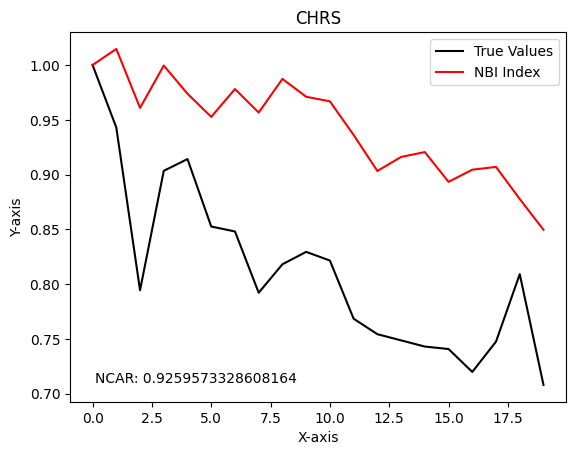

In [4]:
index=55
period=20
true, market = ncar_obj.get_event_data(index, period, normalize=True)
ticker = ncar_obj.eventdata.iloc[index]['ticker']
ncar_obj.plot_ncar(market, true, ticker)

In [5]:
rf_ncars_sub = rf_ncars.dropna()
gb_ncars_sub = gb_ncars.dropna()

In [64]:
test = ncar_obj.stockdata[['ABBV', 'EXTERNAL']]
test = test.droplevel(level=0, axis=1)
test

,open,high,low,close,volume,vwap,transactions,NBI
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.729980
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744.869995
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.090027
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.049988
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733.090027
...,...,...,...,...,...,...,...,...
2023-09-25,152.44,154.74,151.66,154.65,3740015.0,154.0688,54264.0,3933.840088
2023-09-26,154.40,154.60,153.33,153.91,3936257.0,153.9586,60096.0,3962.340088
2023-09-27,153.84,154.00,151.61,153.13,3621183.0,152.9482,56131.0,3976.409912
2023-09-28,153.64,153.83,151.37,152.25,3697512.0,152.2261,52378.0,3972.129883


In [11]:
ncar_obj.eventdata['NCAR'] = ncars.reset_index(drop=True)
subset_events_df = ncar_obj.eventdata.replace([np.inf, -np.inf], np.nan).dropna()


In [12]:
import pandas as pd
import sqlite3

# Create a Pandas DataFrame (replace this with your actual DataFrame)
# SQLite database file path
db_file_path = 'final_data.db'

# SQLite connection
conn = sqlite3.connect(db_file_path)

# Use the to_sql method to write the DataFrame to a new table in the SQLite database
# if_exists='replace' will replace the table if it already exists, you can use 'fail' or 'append' if needed
subset_events_df.to_sql(name='NCAR_FIN', con=conn, index=False, if_exists='replace')

# Close the connection
conn.close()
